In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='bright', font='sans-serif', font_scale=3, color_codes=True)

%matplotlib inline
import h5py

In [2]:
color_agent = {"MB-PSRL": 'green', "MB_UCBVI": 'deepskyblue', "MB-UCRL2": 'darkviolet', "PSRL": 'deeppink'}
label_agent = {"MB-PSRL": 'MB-PSRL', "MB_UCBVI": 'MB-UCBVI', "MB-UCRL2": 'MB-UCRL2', "PSRL": 'PSRL'}
linestyle_agent = {"MB-PSRL": 'solid', "PSRL": (0, (5,10)), "MB-UCRL2": (0, (3, 1, 1, 1)), "MB_UCBVI": (0, (3, 1, 1, 1, 1, 1))}

# Our result

In these first boxes, we plot our result and some of the figures are used in the paper.

**We cannot provide the raw data and all figures here because of limit space in supplementary material upload.**

You can plot the data from your experiment in the boxes after section __Plot your result__.

## Scenario 1: Random Walk

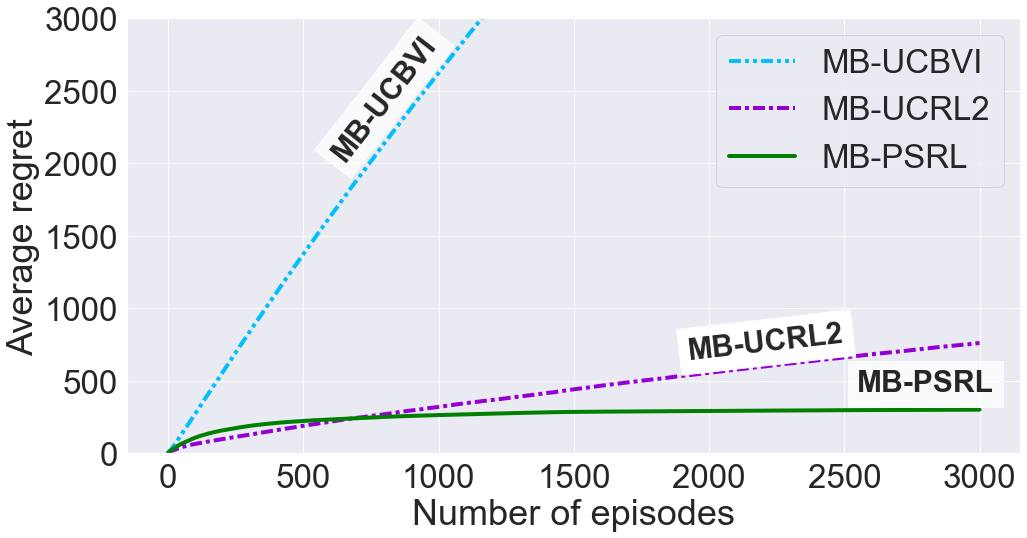

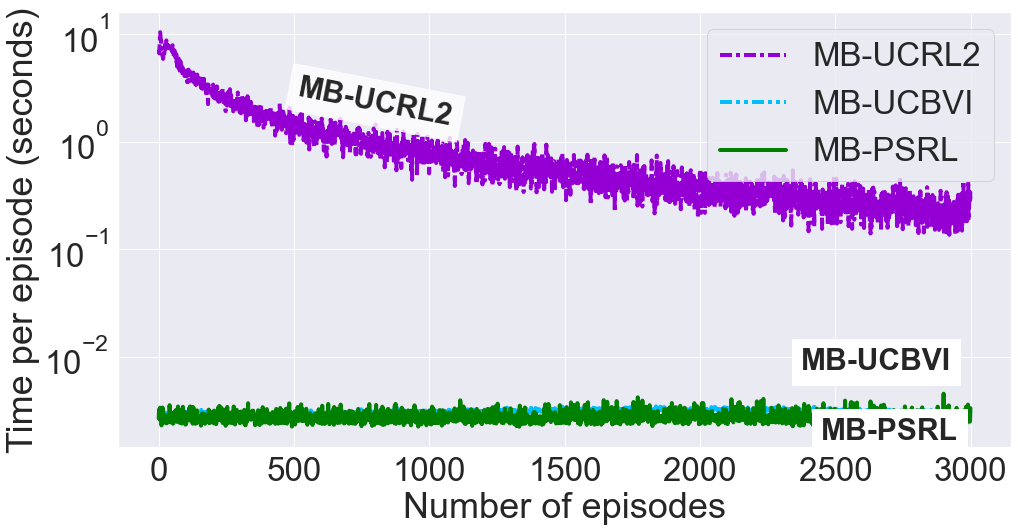

In [3]:
text_size = 30
FigSize = (16, 8) # figure size
with h5py.File("./data/mean_3b4s.hdf5", "r") as f:
    plt.figure(figsize=FigSize)
    for agent_name in ["MB_UCBVI", "MB-UCRL2", "MB-PSRL"]:
            plt.plot(f["regret gaps"][agent_name], label=label_agent[agent_name],
                     linestyle=linestyle_agent[agent_name], color=color_agent[agent_name], linewidth=4)
    plt.text(800, 2450, "MB-UCBVI", size=text_size, weight="bold", rotation=52.,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=0.8,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.text(2210, 764, "MB-UCRL2", size=text_size, weight="bold", rotation=6.5,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=1.0,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.text(2800, 480, "MB-PSRL", size=text_size, weight="bold", rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=0.8,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.ylabel("Average regret")
    plt.xlabel("Number of episodes")
    plt.ylim(0, 3000)
    #plt.title("Average Regret on RandomWalk: 3 chains 4 states")
    plt.legend(loc='best')
    
    plt.figure(figsize=FigSize)
    for agent_name in ["MB-UCRL2", "MB_UCBVI", "MB-PSRL"]:
        plt.semilogy(f["computation time"][agent_name], label=label_agent[agent_name],
                     linestyle=linestyle_agent[agent_name], color=color_agent[agent_name], linewidth=4)
    #plt.title("Average Computation Time: logscale in y-axis")
    plt.text(800, 2.3, "MB-UCRL2", size=text_size, weight="bold", rotation=-11.,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=0.8,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.text(2700, 0.002, "MB-PSRL", size=text_size, weight="bold", rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=1.0,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.text(2650, 0.009, "MB-UCBVI", size=text_size, weight="bold", rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="square", alpha=1.0,
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
         )
    plt.ylabel("Time per episode (seconds)")
    plt.xlabel("Number of episodes")
    plt.legend(loc='best');

Hence, MB-PSRL takes around 8 seconds to complete 3000 episodes.
We note that the time of each algorithm presented above is due to the update of algorithm's parameters and policy computation of each algorithm.

### Plot $\frac{Regret}{\sqrt{K}}$

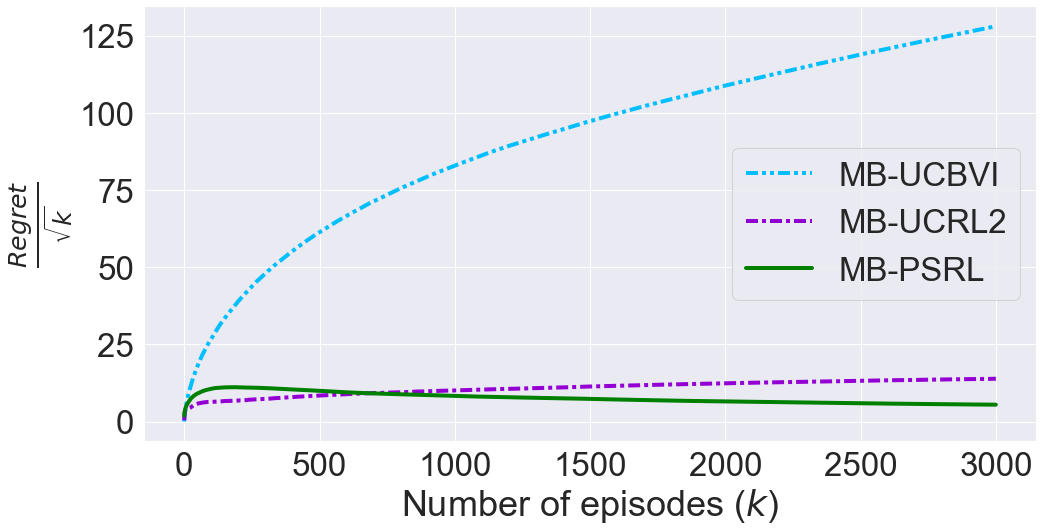

In [4]:
text_size = 30
with h5py.File("./data/mean_3b4s.hdf5", "r") as f:
    plt.figure(figsize=FigSize)
    nb_episodes = f.attrs["nb_episodes"]
    for agent_name in ["MB_UCBVI", "MB-UCRL2", "MB-PSRL"]:
            plt.plot(f["regret gaps"][agent_name]/np.sqrt(np.arange(1,nb_episodes+1)), label=label_agent[agent_name],
                     linestyle=linestyle_agent[agent_name], color=color_agent[agent_name], linewidth=4)
    plt.ylabel(r"$\frac{Regret}{\sqrt{k}}$")
    plt.xlabel(r"Number of episodes ($k$)")
    #plt.title("Average Regret on RandomWalk: 3 chains 4 states")
    plt.legend(loc='best')

## Scenario 2: Task Scheduling

nb_sims: 240 ,nb_episodes: 3000


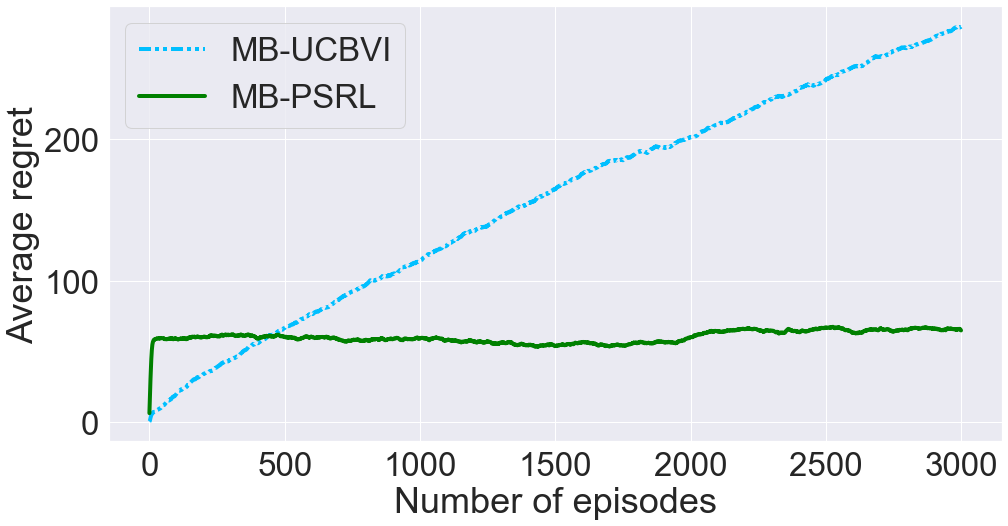

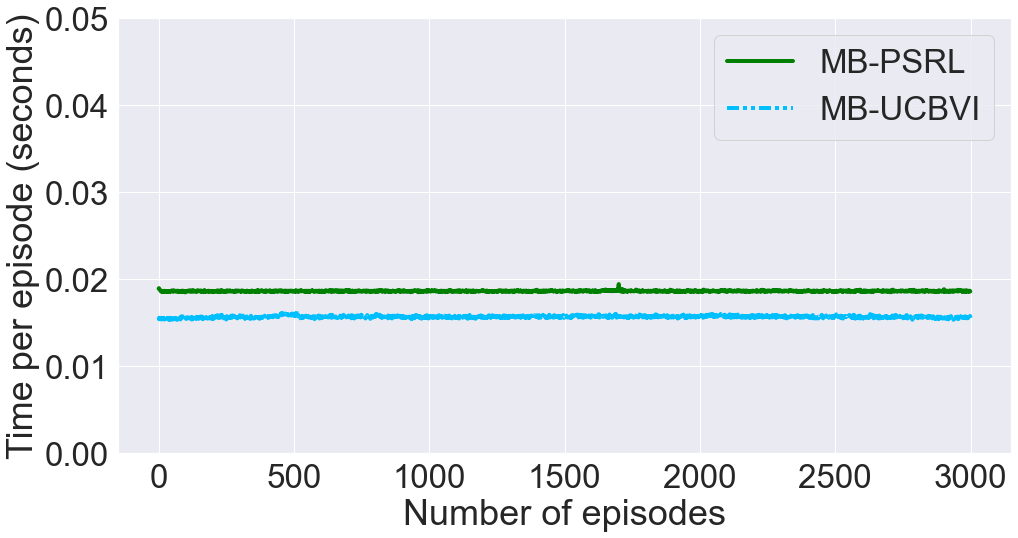

In [5]:
with h5py.File("./data/mean_9b11s.hdf5", "r") as f:
    nb_sims, nb_epis = f.attrs['nb_simulations'], f.attrs['nb_episodes']
    print("nb_sims:", nb_sims, ",nb_episodes:", nb_epis)
    plt.figure(figsize=FigSize)
    plt.plot(f["regret gaps"]["MB_UCBVI"], label=label_agent["MB_UCBVI"], color=color_agent["MB_UCBVI"], linewidth=4, linestyle=linestyle_agent["MB_UCBVI"])
    plt.plot(f["regret gaps"]["MB-PSRL"], label=label_agent["MB-PSRL"], color=color_agent["MB-PSRL"], linewidth=4, linestyle=linestyle_agent["MB-PSRL"])
    plt.ylabel("Average regret")
    plt.xlabel("Number of episodes")
    #plt.ylim(0, 200)
    #plt.title("Average Regret on Task Scheduling: 9 chains 11 states")
    plt.legend(loc='best')
    
    plt.figure(figsize=FigSize)
    plt.plot(f["computation time"]["MB-PSRL"], label=label_agent["MB-PSRL"], color=color_agent["MB-PSRL"], linewidth=4, linestyle=linestyle_agent["MB-PSRL"])
    plt.plot(f["computation time"]["MB_UCBVI"], label=label_agent["MB_UCBVI"], color=color_agent["MB_UCBVI"], linewidth=4, linestyle=linestyle_agent["MB_UCBVI"])
    plt.ylabel("Time per episode (seconds)")
    plt.ylim(0, 0.05)
    plt.xlabel("Number of episodes")
    plt.legend(loc='best');

nb_sims: 240 nb_episodes: 3000


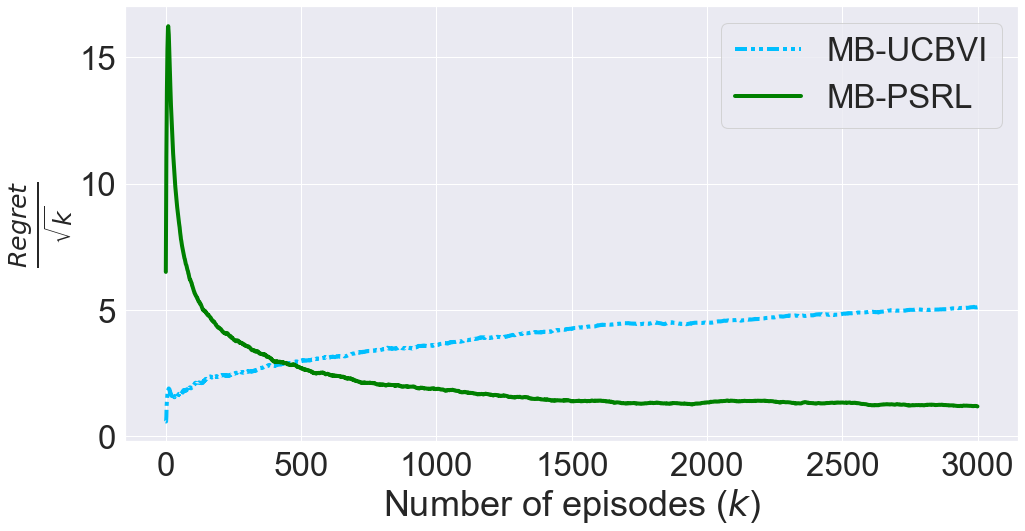

In [6]:
with h5py.File("./data/mean_9b11s.hdf5", "r") as f:
    nb_sims, nb_epis = f.attrs['nb_simulations'], f.attrs['nb_episodes']
    print("nb_sims:", nb_sims, "nb_episodes:", nb_epis)
    plt.figure(figsize=(16, 8))
    plt.plot(f["regret gaps"]["MB_UCBVI"]/np.sqrt(np.arange(1,nb_epis+1)), label=label_agent["MB_UCBVI"], color=color_agent["MB_UCBVI"], linewidth=4, linestyle=linestyle_agent["MB_UCBVI"])
    plt.plot(f["regret gaps"]["MB-PSRL"]/np.sqrt(np.arange(1,nb_epis+1)), label=label_agent["MB-PSRL"], color=color_agent["MB-PSRL"], linewidth=4, linestyle=linestyle_agent["MB-PSRL"])
    plt.ylabel(r"$\frac{Regret}{\sqrt{k}}$")
    plt.xlabel(r"Number of episodes ($k$)")
    #plt.ylim(0, 1500)
    #plt.title("Average Regret on Task Scheduling: 9 chains 11 states")
    plt.legend(loc='best');

## Scenario 3: Prior choice testing

nb_mdps: 16 nb simulations per mdp: 5


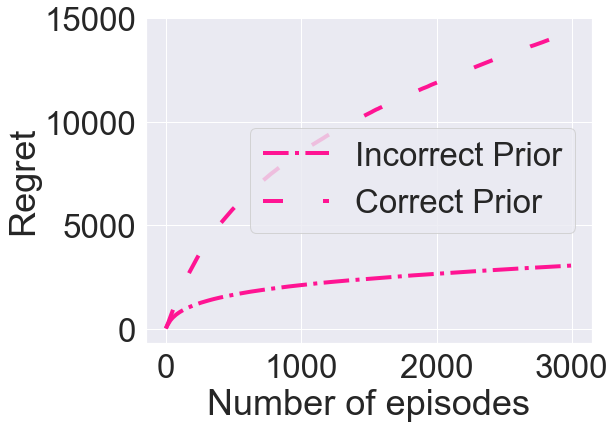

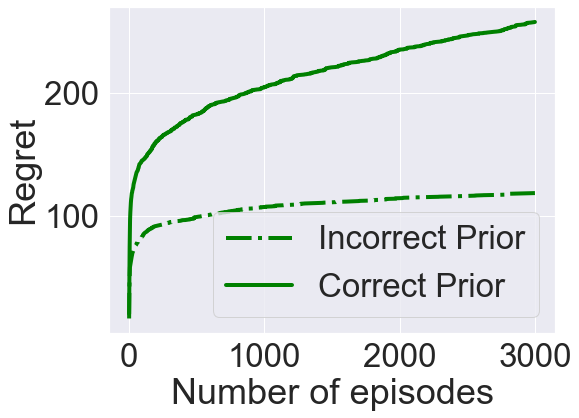

In [7]:
with h5py.File("./data/mean_prior_choice.hdf5", "r") as f:
    nb_mdps = f.attrs["nb mdps"]
    nb_sims_per_mdp = f.attrs["nb sims per mdp"]
    print("nb_mdps:", nb_mdps, "nb simulations per mdp:", nb_sims_per_mdp)
    figSize = (8, 6)
    plt.figure(figsize=figSize)
    #plt.title("Bayesian Regret")
    plt.plot(f["PSRL"]["Correct Prior"], linestyle='-.', linewidth=4, label="Incorrect Prior", color=color_agent["PSRL"])
    plt.plot(f["PSRL"]["Incorrect Prior"], linestyle=linestyle_agent["PSRL"], linewidth=4, label="Correct Prior", color=color_agent["PSRL"])
    plt.xlabel("Number of episodes")
    plt.ylabel("Regret")
    plt.legend(loc="best")
    
    plt.figure(figsize=figSize)
    #plt.title("Bayesian Regret")
    plt.plot(f["MB-PSRL"]["Correct Prior"], linestyle='-.', linewidth=4, label="Incorrect Prior", color=color_agent["MB-PSRL"])
    plt.plot(f["MB-PSRL"]["Incorrect Prior"], linestyle='-', linewidth=4, label="Correct Prior", color=color_agent["MB-PSRL"])
    plt.xlabel("Number of episodes")
    plt.ylabel("Regret")
    plt.legend(loc="best")

# Plot your result

In the following box, you can uncomment all the lines to plot the data from your experiment on your machine.

## Scenario 1: Random Walk

Uncomment the following box.

In [9]:
#FigSize = (16, 8) # figure size
#with h5py.File("./data/result_3b4s.hdf5", "r") as f:
#    plt.figure(figsize=FigSize)
#    for agent_name in ["MB_UCBVI", "MB-UCRL2", "MB-PSRL"]:
#            plt.plot(np.mean(np.cumsum(f["regret gaps"][agent_name],1),0), label=label_agent[agent_name],
#                     linestyle=linestyle_agent[agent_name], color=color_agent[agent_name], linewidth=4)
#    plt.ylabel("Average regret")
#    plt.xlabel("Number of episodes")
#    #plt.ylim(0, 3000)
#    #plt.title("Average Regret on RandomWalk: 3 chains 4 states")
#    plt.legend(loc='best')
#    
#    plt.figure(figsize=FigSize)
#    for agent_name in ["MB-UCRL2", "MB_UCBVI", "MB-PSRL"]:
#        plt.semilogy(np.mean(f["computation time"][agent_name],0), label=label_agent[agent_name],
#                     linestyle=linestyle_agent[agent_name], color=color_agent[agent_name], linewidth=4)
#        print("In average,",agent_name, "take", np.sum(np.mean(f["computation time"][agent_name],0)),
#             "seconds to complete", f.attrs["nb_episodes"], "episodes.")
#    #plt.title("Average Computation Time: logscale in y-axis")
#    plt.ylabel("Time per episode (seconds)")
#    plt.xlabel("Number of episodes")
#    plt.legend(loc='best');

## Scenario 2: Task Scheduling

Uncomment the following box.

In [10]:
#with h5py.File("./data/result_9b11s.hdf5", "r") as f:
#    nb_sims, nb_epis = f["regret gaps"]["MB-PSRL"].shape
#    print("nb_sims:", nb_sims, ",nb_episodes:", nb_epis)
#    plt.figure(figsize=FigSize)
#    plt.plot(np.mean(np.cumsum(f["regret gaps"]["MB_UCBVI"],1),0), label=label_agent["MB_UCBVI"], color=color_agent["MB_UCBVI"], linewidth=4, linestyle=linestyle_agent["MB_UCBVI"])
#    plt.plot(np.mean(np.cumsum(f["regret gaps"]["MB-PSRL"],1),0), label=label_agent["MB-PSRL"], color=color_agent["MB-PSRL"], linewidth=4, linestyle=linestyle_agent["MB-PSRL"])
#    plt.ylabel("Average regret")
#    plt.xlabel("Number of episodes")
#    #plt.ylim(0, 200)
#    #plt.title("Average Regret on Task Scheduling: 9 chains 11 states")
#    plt.legend(loc='best')
#    
#    plt.figure(figsize=FigSize)
#    plt.plot(np.mean(f["computation time"]["MB-PSRL"],0), label=label_agent["MB-PSRL"], color=color_agent["MB-PSRL"], linewidth=4, linestyle=linestyle_agent["MB-PSRL"])
#    plt.plot(np.mean(f["computation time"]["MB_UCBVI"],0), label=label_agent["MB_UCBVI"], color=color_agent["MB_UCBVI"], linewidth=4, linestyle=linestyle_agent["MB_UCBVI"])
#    for agent_name in ["MB-PSRL", "MB_UCBVI"]:
#        print("In average,",agent_name, "take", np.sum(np.mean(f["computation time"][agent_name],0)),
#              "seconds to complete", f.attrs["nb_episodes"], "episodes.")
#    plt.ylabel("Time per episode (seconds)")
#    plt.ylim(0, 0.05)
#    plt.xlabel("Number of episodes")
#    plt.legend(loc='best');

## Scenario 3: Bayesian Regret - Prior choice

Uncomment the following box.

In [11]:
#with h5py.File("./data/prior_choice.hdf5", "r") as f:
#    nb_mdps = f.attrs["nb mdps"]
#    nb_sims_per_mdp = f.attrs["nb sims per mdp"]
#    print("nb_mdps:", nb_mdps, "nb simulations per mdp:", nb_sims_per_mdp)
#    figSize = (8, 6)
#    plt.figure(figsize=figSize)
#    #plt.title("Correct Prior Regret")
#    PSRL = f["PSRL"]["Correct Prior"]
#    incorr_PSRL = f["PSRL"]["Incorrect Prior"]
#    regrets = np.cumsum(PSRL, 1)
#    avg_regret = np.mean(regrets, 0)
#    
#    for mdp_idx in range(nb_mdps):
#        plt.plot(np.mean(regrets[mdp_idx*nb_sims_per_mdp:(mdp_idx+1)*nb_sims_per_mdp], 0), linestyle=':', linewidth=2)
#    plt.plot(avg_regret, linestyle=linestyle_agent["PSRL"], linewidth=4, label="average regret", color=color_agent["PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")
#    
#    plt.figure(figsize=figSize)
#    #plt.title("Incorrect Prior Regret")
#    regrets = np.cumsum(incorr_PSRL, 1)
#    avg_regret = np.mean(regrets, 0)
#    
#    for mdp_idx in range(nb_mdps):
#        plt.plot(np.mean(regrets[mdp_idx*nb_sims_per_mdp:(mdp_idx+1)*nb_sims_per_mdp], 0), linestyle=':', linewidth=2)
#    plt.plot(avg_regret, linestyle='-.', linewidth=4, label="average regret", color=color_agent["PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")
#    
#    plt.figure(figsize=figSize)
#    #plt.title("Bayesian Regret")
#    plt.plot(np.mean(np.cumsum(incorr_PSRL,1), 0), linestyle='-.', linewidth=4, label="Incorrect Prior", color=color_agent["PSRL"])
#    plt.plot(np.mean(np.cumsum(PSRL,1), 0), linestyle=linestyle_agent["PSRL"], linewidth=4, label="Correct Prior", color=color_agent["PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")
#    
#    plt.figure(figsize=figSize)
#    #plt.title("Correct Prior Regret")
#    mb_psrl = f["MB-PSRL"]["Correct Prior"]
#    incorr_mb_psrl = f["MB-PSRL"]["Incorrect Prior"]
#    regrets = np.cumsum(mb_psrl, 1)
#    avg_regret = np.mean(regrets, 0)
#    for mdp_idx in range(nb_mdps):
#        plt.plot(np.mean(regrets[mdp_idx*nb_sims_per_mdp:(mdp_idx+1)*nb_sims_per_mdp], 0), linestyle=':', linewidth=2)
#    plt.plot(avg_regret, linestyle=linestyle_agent["MB-PSRL"], linewidth=4, label="average regret", color=color_agent["MB-PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")
#    
#    plt.figure(figsize=figSize)
#    #plt.title("Incorrect Prior Regret")
#    regrets = np.cumsum(incorr_mb_psrl, 1)
#    avg_regret = np.mean(regrets, 0)
#    for mdp_idx in range(nb_mdps):
#        plt.plot(np.mean(regrets[mdp_idx*nb_sims_per_mdp:(mdp_idx+1)*nb_sims_per_mdp], 0), linestyle=':', linewidth=2)
#    plt.plot(avg_regret, linestyle='-.', linewidth=4, label="average regret", color=color_agent["MB-PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")
#    
#    plt.figure(figsize=figSize)
#    #plt.title("Bayesian Regret")
#    plt.plot(np.mean(np.cumsum(incorr_mb_psrl,1), 0), linestyle='-.', linewidth=4, label="Incorrect Prior", color=color_agent["MB-PSRL"])
#    plt.plot(np.mean(np.cumsum(mb_psrl,1), 0), linestyle='-', linewidth=4, label="Correct Prior", color=color_agent["MB-PSRL"])
#    plt.xlabel("Number of episodes")
#    plt.ylabel("Regret")
#    plt.legend(loc="best")